In [8]:
from gd_env import GeometryEnv
from model import Agent
import torch
import numpy as np
import matplotlib.pyplot as plt

In [9]:

# creamos el entorno y el agente

env = GeometryEnv()
state_size = len(env.get_state())
action_size = 2  # 0: no saltar, 1: saltar

agent = Agent(state_size, action_size)
episodes = 500
batch_size = 64

# Almacenar métricas
rewards_history = []
epsilon_history = []

for e in range(episodes):
    state = env.reset()
    total_reward = 0
    for t in range(1000):  # pasos por episodio
        action = agent.act(state)
        next_state, reward, done, _ = env.step(action)
        agent.remember(state, action, reward, next_state, done)
        state = next_state
        total_reward += reward

        agent.replay(batch_size)
        if done:
            agent.update_target_model()
            break

    rewards_history.append(total_reward)
    epsilon_history.append(agent.epsilon)
    
    print("Ep", e + 1, "/", episodes, 
      "| Recompensa total:", round(total_reward, 2), 
      "| Epsilon:", round(agent.epsilon, 3))

# Guardar modelo
torch.save(agent.model.state_dict(), "geometry_dqn.pth")


Ep 1 / 500 | Recompensa total: 2.0 | Epsilon: 0.238
Ep 2 / 500 | Recompensa total: -5.0 | Epsilon: 0.151
Ep 3 / 500 | Recompensa total: -2.0 | Epsilon: 0.089
Ep 4 / 500 | Recompensa total: 1.0 | Epsilon: 0.055
Ep 5 / 500 | Recompensa total: -5.0 | Epsilon: 0.05
Ep 6 / 500 | Recompensa total: 0.0 | Epsilon: 0.05
Ep 7 / 500 | Recompensa total: -2.0 | Epsilon: 0.05
Ep 8 / 500 | Recompensa total: -5.0 | Epsilon: 0.05
Ep 9 / 500 | Recompensa total: 6.0 | Epsilon: 0.05
Ep 10 / 500 | Recompensa total: -5.0 | Epsilon: 0.05
Ep 11 / 500 | Recompensa total: 23.0 | Epsilon: 0.05
Ep 12 / 500 | Recompensa total: 9.0 | Epsilon: 0.05
Ep 13 / 500 | Recompensa total: -1.0 | Epsilon: 0.05
Ep 14 / 500 | Recompensa total: -5.0 | Epsilon: 0.05
Ep 15 / 500 | Recompensa total: -2.0 | Epsilon: 0.05
Ep 16 / 500 | Recompensa total: 4.0 | Epsilon: 0.05
Ep 17 / 500 | Recompensa total: 0.0 | Epsilon: 0.05
Ep 18 / 500 | Recompensa total: -5.0 | Epsilon: 0.05
Ep 19 / 500 | Recompensa total: -5.0 | Epsilon: 0.05
Ep 20

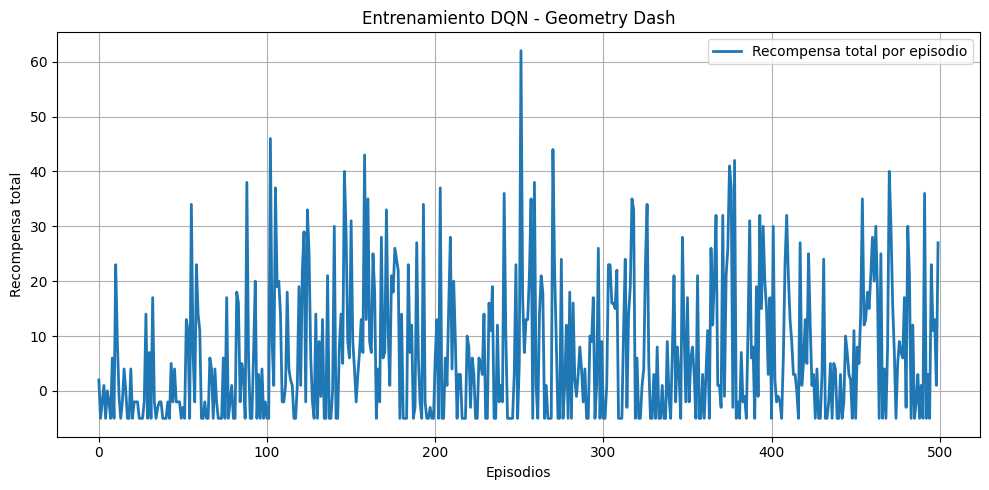

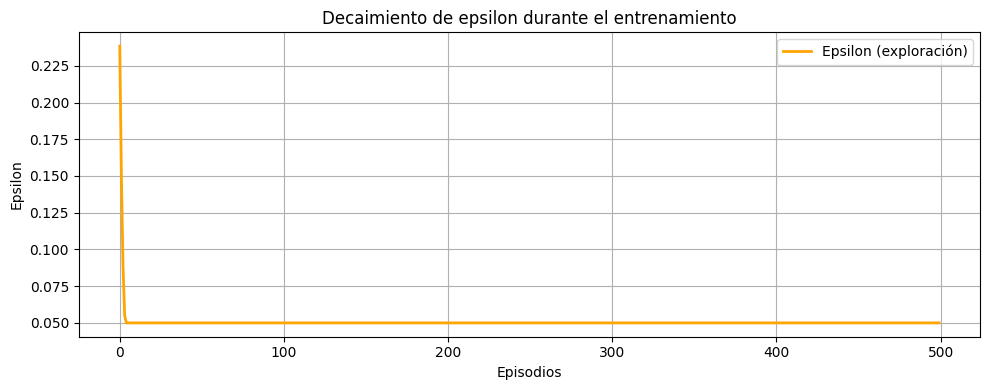

In [10]:
plt.figure(figsize=(10,5))
plt.plot(rewards_history, label="Recompensa total por episodio", linewidth=2)
plt.xlabel("Episodios")
plt.ylabel("Recompensa total")
plt.title("Entrenamiento DQN - Geometry Dash")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# También puedes graficar la evolución de epsilon
plt.figure(figsize=(10,4))
plt.plot(epsilon_history, color="orange", label="Epsilon (exploración)", linewidth=2)
plt.xlabel("Episodios")
plt.ylabel("Epsilon")
plt.title("Decaimiento de epsilon durante el entrenamiento")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()